In [88]:
from interfacemaster.cellcalc import get_primitive_hkl
from interfacemaster.interface_generator import core, print_near_axis, convert_vector_index
from numpy import array, dot, round, average, var
from numpy.linalg import inv,det

In [89]:
my_interface = core('cif_files/Si_mp-149_conventional_standard.cif',\
                    'cif_files/Si3N4_mp-988_conventional_standard.cif')

Warning!, this programme will rewrite the POSCAR file in this dir!


/Users/jasonxie/.local/lib/python3.8/site-packages/pymatgen/io/cif.py:1121: UserWarning: Issues encountered while parsing CIF: Some fractional co-ordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: %s" % "\n".join(self.warnings))


# Get the two axis aligned to be collinear, expressed in primitive cell

Here, we want the (111) plane of the Si coincident whith (0001) plane of Si3N4.
Firstly, the programme rotate lattice 2 so that the two lattice plane overlap

In [90]:
axis = convert_vector_index(my_interface.conv_lattice_1, my_interface.lattice_1, [1,1,1])
axis

array([-1., -1., -1.])

In [91]:
axis = convert_vector_index(my_interface.conv_lattice_2, my_interface.lattice_2, [0,0,1])
axis

array([-1.,  0.,  0.])

rotation lattice 2 so that the [1,0,0] axis is along [-1, -1, -1] axis of lattice 1

In [92]:
my_interface.set_orientation_axis([-1., -1., -1],[-1.,  0.,  0.])

# Searching for a two_dimensional CSL

In [93]:
my_interface.parse_limit(du = 1e-1, S  = 1e-1, sgm1=100, sgm2=100, dd = 1e-1)

#Do searching!
#We already know that there is a CSL by rotation 180 degrees
my_interface.search_one_position([-1., -1., -1],0,180,0.01,two_D = True)

[5.468728 5.468728 5.468728]
Congrates, we found an appx CSL!

U1 = 
[[ 0  7  0]
 [ 0 -7  7]
 [ 1  0  0]]; sigma_1 = 49

U2 = 
[[ 0  4 -2]
 [ 0  2 -4]
 [ 1  0  0]]; sigma_2 = 49

D = 
[[ 1.02007597 -0.          0.        ]
 [-0.          1.02007597  0.        ]
 [-0.         -0.          1.        ]]

axis = [5.468728 5.468728 5.468728] ; theta = 0.0



# Get the bicrystal

In [94]:
my_interface.compute_bicrystal_two_D(orthogonal = False, lim = 50, tol = 1e-2)

In [95]:
my_interface.get_bicrystal(xyz_1 = [1,1,1], xyz_2 = [1,1,1], two_D= True, \
                           filetype = 'LAMMPS', filename = 'atominfile')

In [96]:
my_interface.sample_CNID(grid = [5,5],xyz_1 = [1,1,1], xyz_2 = [1,1,1], \
                           two_D = True, filetype = 'VASP', filename = 'POSCAR')

CNID
[[ 0.16666667 -0.33333333]
 [-0.33333333  0.16666667]
 [ 0.16666667  0.16666667]]
making 400 files...
completed


In [97]:
CNID = my_interface.CNID.copy()

# Check different terminating planes

There exist some choices of terminating planes of both slabs,
we can directly see these planes here

saving high resolution figure will take some time...please wait for a while :D


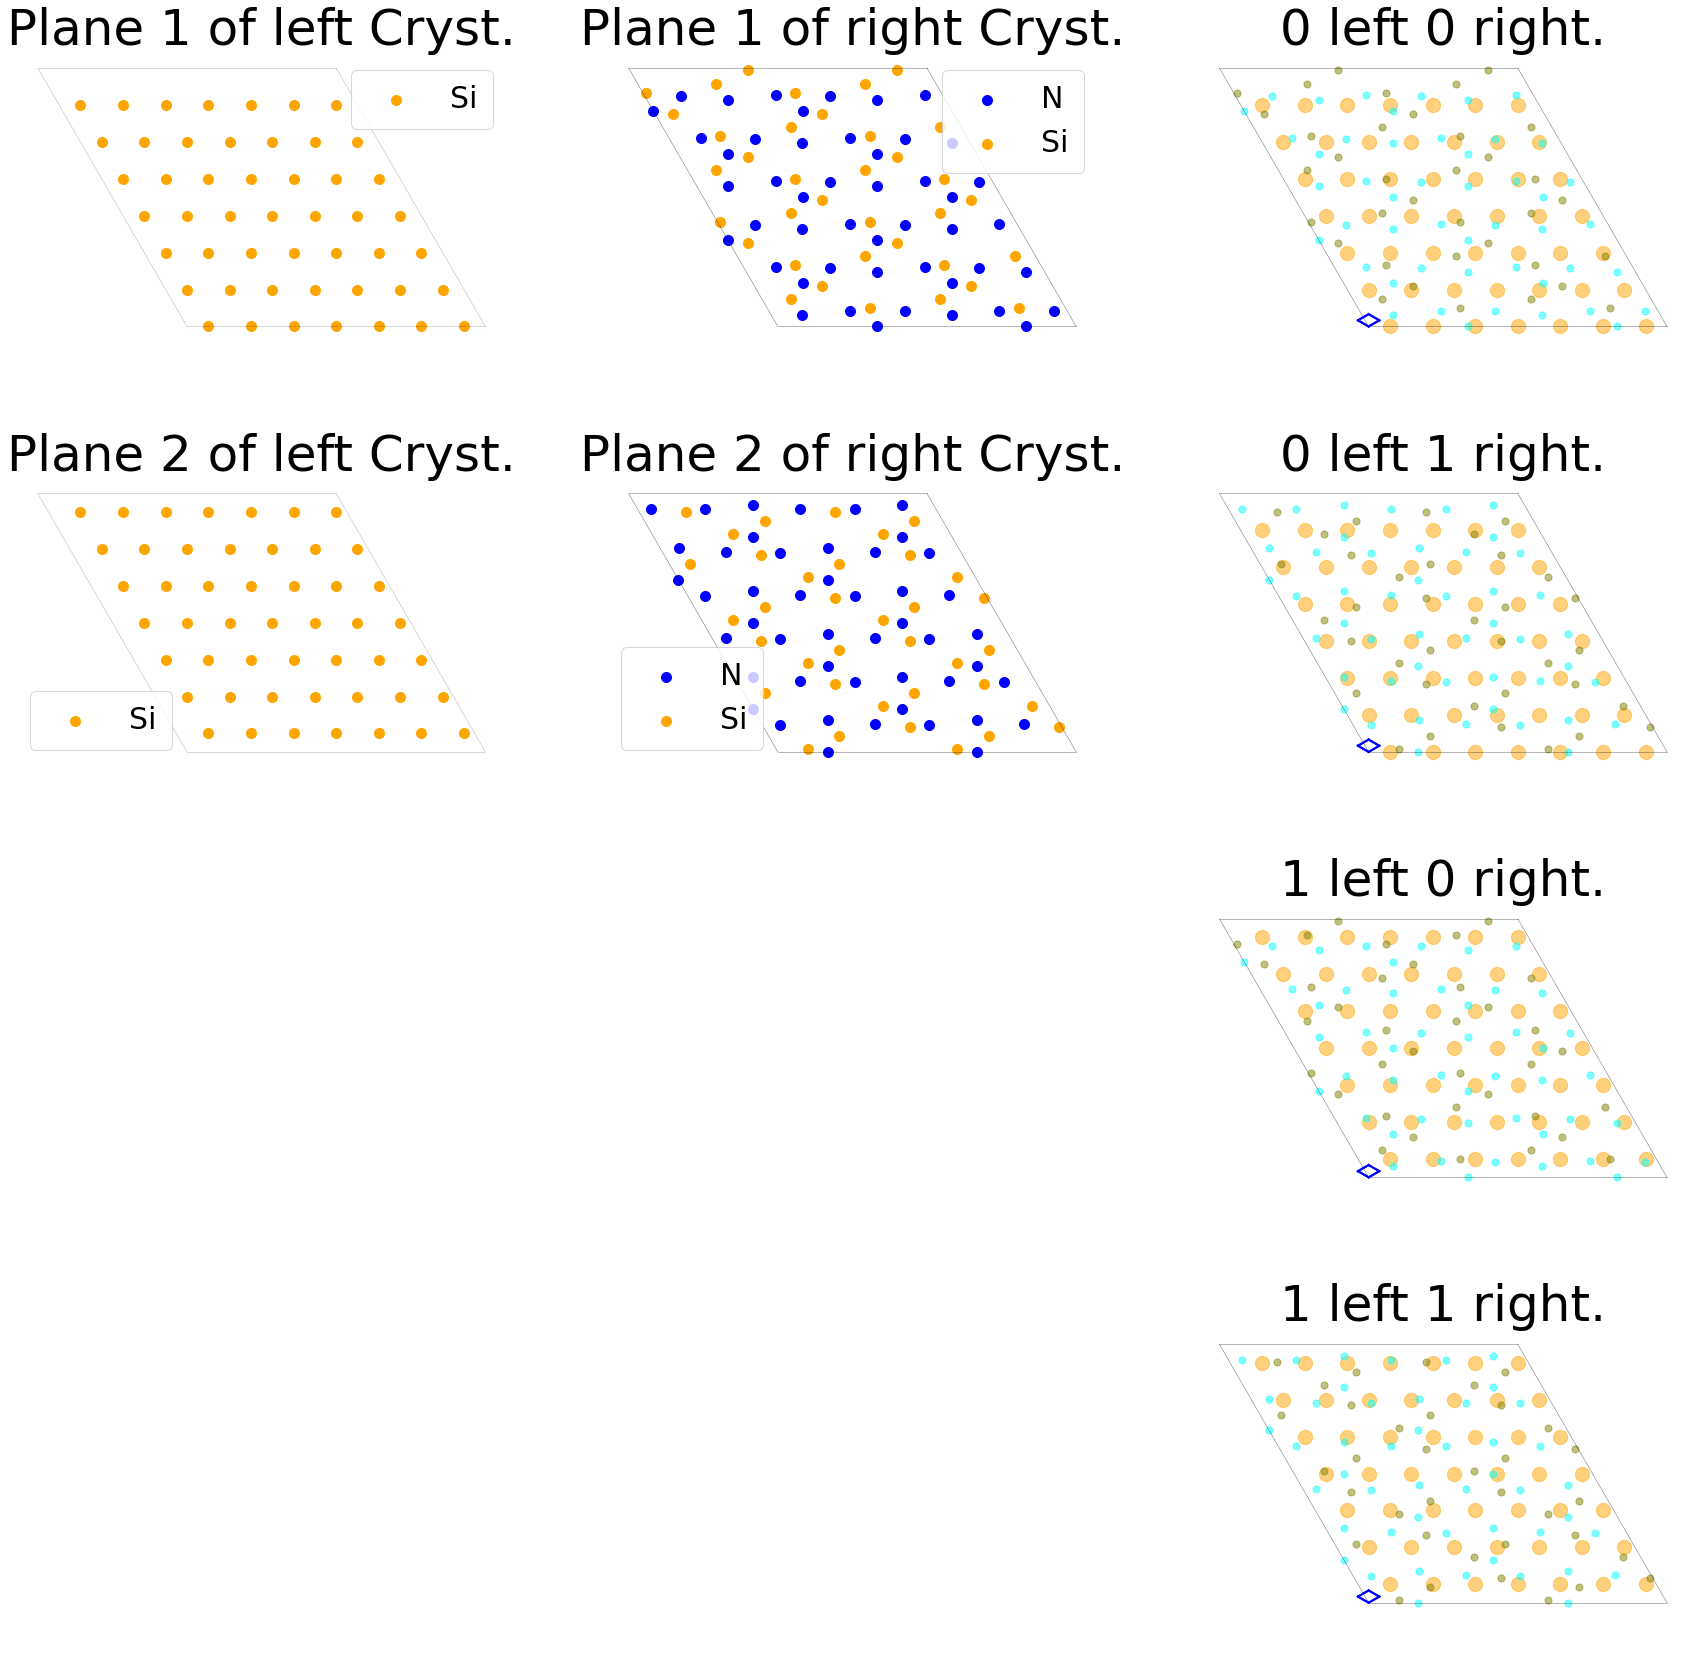

In [98]:
my_interface.draw_terminations(figuresize = (30,30), figuredpi = 100, legendsize = 30)